In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, time
from sklearn.preprocessing import LabelEncoder
import math

In [3]:
df = pd.read_csv("C:/Users/singh/Desktop/TAP/Project2_TAP/Client_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
df.describe

<bound method NDFrame.describe of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...

In [5]:
# Sum the missing values in the dataset
print(df.isnull().sum())

# Dropping the 'ID' and 'SEX' columns
df = df.drop(columns=['ID', 'SEX'])

# Verify the columns have been removed
print(df.columns)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64
Index(['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'B

In [6]:
# Rename the variable
df.rename(columns={'default payment next month': 'default_payment'}, inplace=True)

# Distribute the class
df['default_payment'].value_counts()

default_payment
0    23364
1     6636
Name: count, dtype: int64

# <font color ="006179"> Exploratory Data Analysis </font>

C:\Users\singh\AppData\Local\Temp\ipykernel_35248\23178794.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default_payment', data=df, palette='Set2')


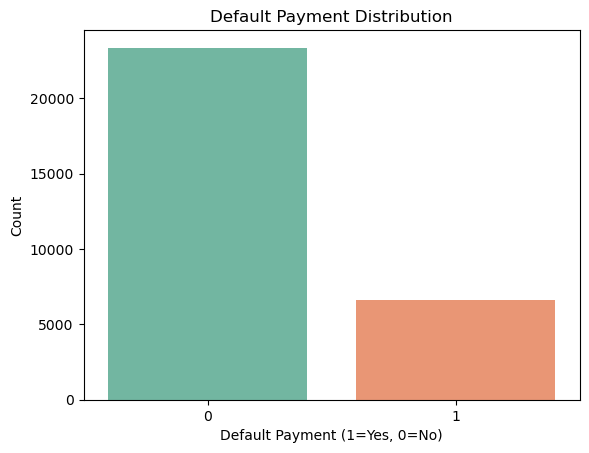

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class Distribution
sns.countplot(x='default_payment', data=df, palette='Set2')
plt.title('Default Payment Distribution')
plt.xlabel('Default Payment (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()
## Purpose: Understand class imbalance.

# <font color ="006179"> Credit Limit Vs Default Status </font>

C:\Users\singh\AppData\Local\Temp\ipykernel_35248\1836881515.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default_payment', y='LIMIT_BAL', data=df, palette='pastel')


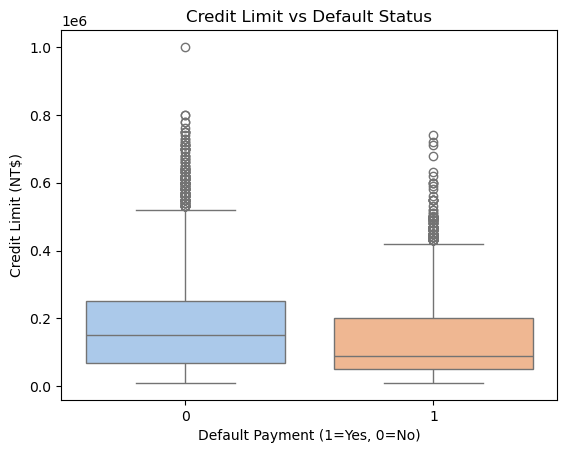

In [8]:
sns.boxplot(x='default_payment', y='LIMIT_BAL', data=df, palette='pastel')
plt.title('Credit Limit vs Default Status')
plt.xlabel('Default Payment (1=Yes, 0=No)')
plt.ylabel('Credit Limit (NT$)')
plt.show()

# <font color ="006179"> Repayment Status Heatmap </font>

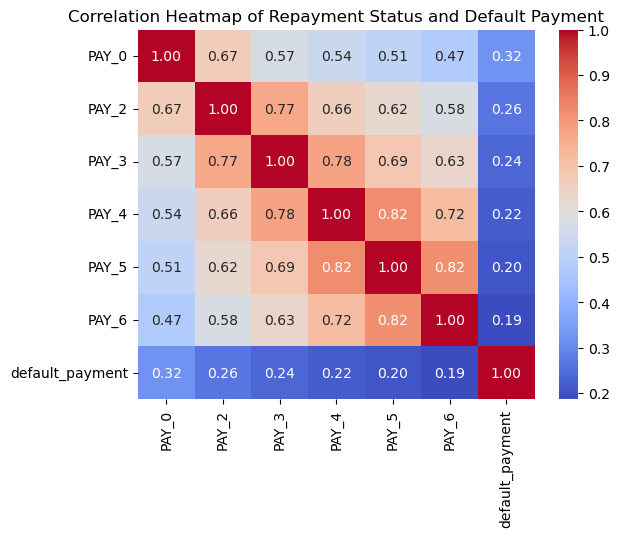

In [9]:
repayment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default_payment']
corr = df[repayment_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Repayment Status and Default Payment')
plt.show()

#A heatmap of correlations between repayment statuses (PAY_0 to PAY_6) and default_payment

# <font color ="006179"> Age distribution by Default Status </font>

C:\Users\singh\AppData\Local\Temp\ipykernel_35248\47184190.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='AGE', hue='default_payment', shade=True, palette='husl')


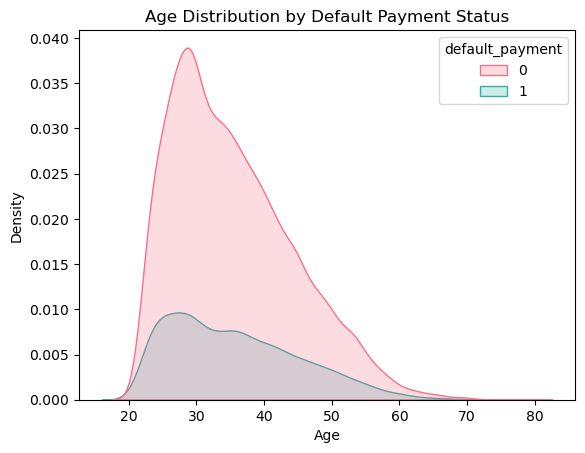

In [10]:
sns.kdeplot(data=df, x='AGE', hue='default_payment', shade=True, palette='husl')
plt.title('Age Distribution by Default Payment Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# <font color ="006179"> 5. Previous Payments vs Bill Amounts </font> 

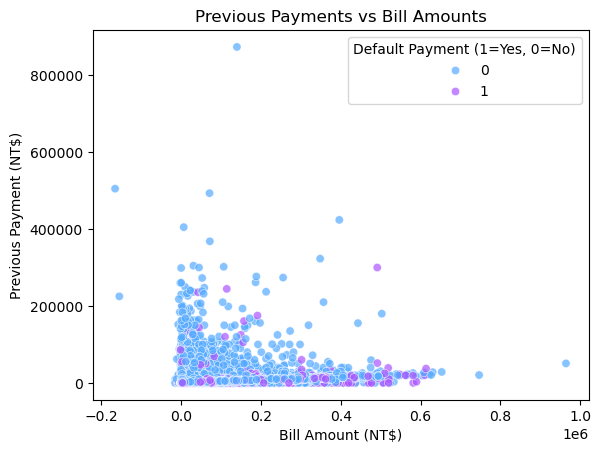

In [11]:
sns.scatterplot(x='BILL_AMT1', y='PAY_AMT1', hue='default_payment', data=df, palette='cool', alpha=0.7)
plt.title('Previous Payments vs Bill Amounts')
plt.xlabel('Bill Amount (NT$)')
plt.ylabel('Previous Payment (NT$)')
plt.legend(title='Default Payment (1=Yes, 0=No)')
plt.show()

# <font color ="006179">7. Credit Limit Distribution by Default Payment Status</font>  

C:\Users\singh\AppData\Local\Temp\ipykernel_35248\1753235317.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(title='Default Payment (1=Yes, 0=No)')


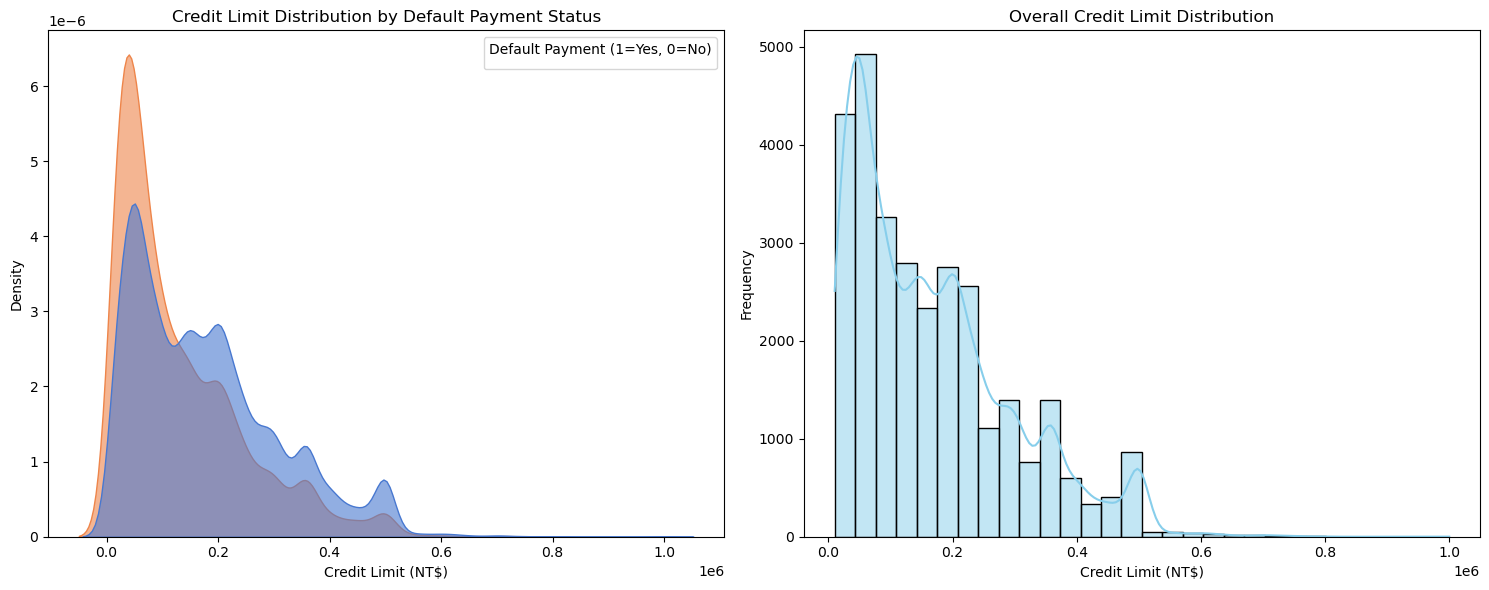

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

# KDE Plot: Credit Limit Distribution by Default Payment Status
sns.kdeplot(
    data=df, 
    x='LIMIT_BAL', 
    hue='default_payment', 
    fill=True, 
    common_norm=False, 
    palette='muted', 
    alpha=0.6, 
    ax=axes[0]
)
axes[0].set_title('Credit Limit Distribution by Default Payment Status')
axes[0].set_xlabel('Credit Limit (NT$)')
axes[0].set_ylabel('Density')
axes[0].legend(title='Default Payment (1=Yes, 0=No)')

# Histogram: Overall Credit Limit Distribution
sns.histplot(
    df['LIMIT_BAL'], 
    kde=True, 
    color='skyblue', 
    bins=30, 
    ax=axes[1]
)
axes[1].set_title('Overall Credit Limit Distribution')
axes[1].set_xlabel('Credit Limit (NT$)')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# <font color ="006179"> Correlation Matrix </font>  

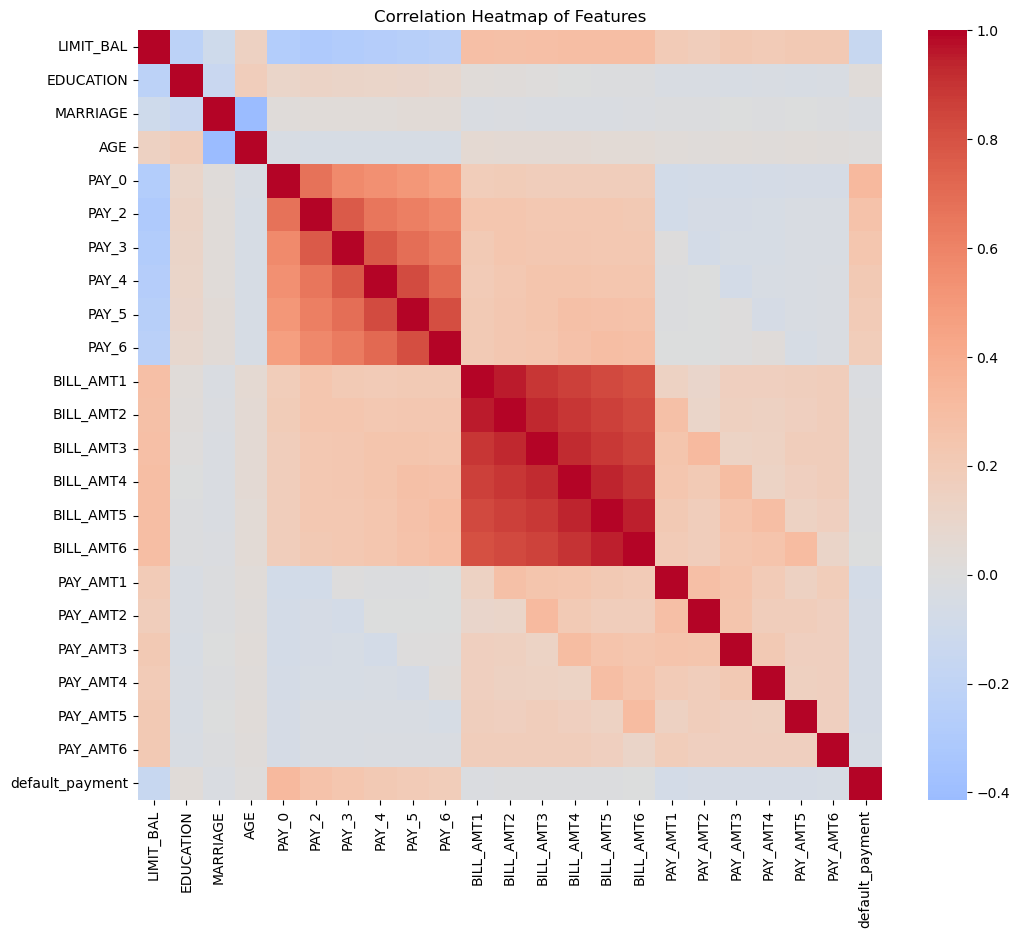

In [13]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Features")
plt.show()

# <font color ="006179"> Feature Engineering </font>  

# <font color ="006179"> Feature Importance of existing features </font>  

In [14]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split  # Import train_test_split

# Assuming your DataFrame is named `df`
# Features and target variable
X = df.drop(columns=['default_payment'])  # Features
y = df['default_payment']  # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Extract feature importance scores
booster = xgb_model.get_booster()
importance_scores = booster.get_score(importance_type='gain')

# Convert importance scores to a DataFrame
importance_df = pd.DataFrame(
    list(importance_scores.items()), 
    columns=['Feature', 'Gain Importance']
).sort_values(by='Gain Importance', ascending=False)

# Display the feature importance
print("Feature Importance with respect to 'default_payment':")
print(importance_df)


Feature Importance with respect to 'default_payment':
      Feature  Gain Importance
4       PAY_0        66.332794
5       PAY_2        23.553852
6       PAY_3        10.051223
8       PAY_5         6.082948
7       PAY_4         5.917892
9       PAY_6         5.375324
18   PAY_AMT3         4.450848
0   LIMIT_BAL         4.202031
1   EDUCATION         3.951167
16   PAY_AMT1         3.950423
10  BILL_AMT1         3.890610
11  BILL_AMT2         3.782883
12  BILL_AMT3         3.694119
19   PAY_AMT4         3.677288
17   PAY_AMT2         3.551271
21   PAY_AMT6         3.457284
13  BILL_AMT4         3.357065
20   PAY_AMT5         3.338144
14  BILL_AMT5         3.246104
15  BILL_AMT6         3.231071
3         AGE         3.208190
2    MARRIAGE         2.876211


# <font color="006179"> Feature Importance of New Features with Respect to "default_payment" </font>

- **Weight**: Measures how often a feature is used to split data across all trees in the model with respect to predicting the target variable, **"default_payment"**.  
- **Gain**: Reflects the average improvement in model performance when a feature is used, highlighting its contribution to predicting **"default_payment"**.


In [15]:
#import pandas as pd
#from xgboost import XGBClassifier
#from sklearn.model_selection import train_test_split
#
## Assuming your DataFrame is named `df`
#
## 1. Create new features
#df['avg_repayment_status'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)
#df['max_delinquency'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].max(axis=1)
#df['total_delays'] = (df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] > 0).sum(axis=1)
#df['total_bill_amt'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
#df['total_payment_amt'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)
#df['payment_to_bill_ratio'] = df['total_payment_amt'] / df['total_bill_amt']
#df['payment_to_bill_ratio'].replace([float('inf'), -float('inf')], 0, inplace=True)  # Handle div by zero
#df['payment_consistency'] = (df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] == -1).sum(axis=1)
#df['is_married'] = df['MARRIAGE'].apply(lambda x: 1 if x == 1 else 0)
#df['total_recent_activity'] = (
#    df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
#    + df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)
#)
#
## Display the list of new features
#new_features = [
#    'avg_repayment_status', 'max_delinquency', 'total_delays',
#    'total_bill_amt', 'total_payment_amt', 'payment_to_bill_ratio',
#    'payment_consistency', 'is_married', 'total_recent_activity'
#]
#print("List of New Features:")
#print(new_features)
#
## 2. Features and target variable
#X = df[new_features]  # Use only new features
#y = df['default_payment']  # Target variable
#
## 3. Split dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
## 4. Train XGBoost Classifier
#xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
#xgb_model.fit(X_train, y_train)
#
## 5. Extract feature importance scores
#booster = xgb_model.get_booster()
#importance_scores = booster.get_score(importance_type='gain')
#
## Convert importance scores to a DataFrame
#importance_df = pd.DataFrame(
#    list(importance_scores.items()), 
#    columns=['Feature', 'Gain Importance']
#).sort_values(by='Gain Importance', ascending=False)
#
## Display feature importance
#print("\nFeature Importance for New Features:")
#print(importance_df)
#

# Assuming df is your DataFrame and has 'PAY_0', 'SEX', and 'MARRIAGE' columns

# 1. Interaction features
#df['PAY_0_EDUCATION'] = df['PAY_0'] * df['EDUCATION']

# 2. Ratio features
# For PAY_0_marry_ratio: Using mean PAY_0 values based on MARRIAGE (grouped by marriage status)
#df['PAY_0_marry_ratio'] = df['PAY_0'] / df.groupby('MARRIAGE')['PAY_0'].transform('mean')

# 3. Categorical Encodings
# Encoding 'SEX' and 'MARRIAGE' as binary features
#df['SEX_encoded'] = df['SEX'].apply(lambda x: 1 if x == 1 else 0)  # 1 for Male, 0 for Female
#df['MARRIAGE_encoded'] = df['MARRIAGE'].apply(lambda x: 1 if x == 1 else 0)  # 1 for Married, 0 for Single

# 4. Extra features

# <font color ="006179"> Modelling using SHAP features </font>  

In [16]:
import pandas as pd

# Define payment columns
payment_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
payment_amt_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
bill_columns = ['BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Average delay in payment
df['avg_payment_delay'] = df[payment_columns].mean(axis=1)

# Total number of defaults
df['total_default'] = df[payment_columns].apply(lambda row: sum(row > 0), axis=1)

# Ratio of bill amounts to payment amounts
df['avg_bill_to_payment_ratio'] = df[bill_columns].sum(axis=1) / (df[payment_amt_columns].sum(axis=1) + 1e-6)

# Maximum delinquency
df['max_delinquency'] = df[['PAY_0', 'PAY_2', 'PAY_3']].max(axis=1)

# Interaction between LIMIT_BAL and max delinquency
df['LIMIT_BAL_max_delinquency'] = df['LIMIT_BAL'] * df['max_delinquency']

# Create TIMELYPAYMENT
on_time_columns = ['PAY_0', 'PAY_2', 'PAY_3']
df['TIMELYPAYMENT'] = df[on_time_columns].apply(lambda x: sum([1 for val in x if val in [-2, -1]]), axis=1)
df['TIMELYPAYMENT'] = df['TIMELYPAYMENT'].apply(lambda x: 1 if x > 0 else 0)

# Average repayment status
df['avg_repayment_status'] = df[['PAY_0', 'PAY_2', 'PAY_3']].mean(axis=1)

# Limit vs recent bill
df['limit_vs_recent_bill'] = df['LIMIT_BAL'] - df['BILL_AMT1']

# Recent bill difference
df['recent_bill_difference'] = df['BILL_AMT1'] - df['BILL_AMT2']

# New features to display
new_features = [
   'avg_repayment_status', 'limit_vs_recent_bill',
    'LIMIT_BAL_max_delinquency', 'TIMELYPAYMENT', 'recent_bill_difference',
    'total_default', 'avg_bill_to_payment_ratio',
]

# Display the head of the new features
print(df[new_features].head())

   avg_repayment_status  limit_vs_recent_bill  LIMIT_BAL_max_delinquency  \
0              1.000000                 16087                      40000   
1              0.333333                117318                     240000   
2              0.000000                 60761                          0   
3              0.000000                  3010                          0   
4             -0.666667                 41383                          0   

   TIMELYPAYMENT  recent_bill_difference  total_default  \
0              1                     811              2   
1              1                     957              2   
2              0                   15212              0   
3              0                   -1243              0   
4              1                    2947              0   

   avg_bill_to_payment_ratio  
0                   0.000000  
1                   1.997600  
2                   4.068615  
3                  10.350501  
4                   1.002845  


# <font color ="006179"> Feature Importance on SHAP features </font>  

In [17]:
df.dtypes

LIMIT_BAL                      int64
EDUCATION                      int64
MARRIAGE                       int64
AGE                            int64
PAY_0                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default_payment                int64
avg_payment_delay            float64
total_default                  int64
avg_bill_to_payment_ratio    float64
max_delinquency                int64
L

<Figure size 1000x800 with 0 Axes>

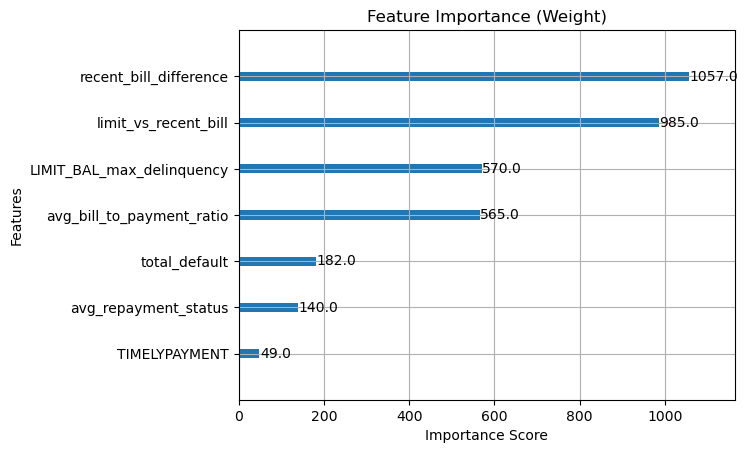

<Figure size 1000x800 with 0 Axes>

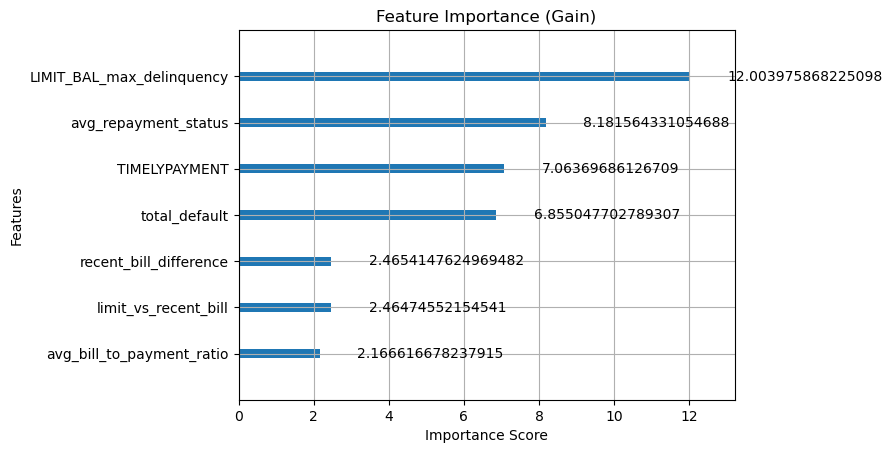

                     Feature  Importance Score
2  LIMIT_BAL_max_delinquency          0.291351
0       avg_repayment_status          0.198577
3              TIMELYPAYMENT          0.171445
5              total_default          0.166380
4     recent_bill_difference          0.059839
1       limit_vs_recent_bill          0.059822
6  avg_bill_to_payment_ratio          0.052586


In [18]:
import pandas as pd
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Convert float columns to int64
df = df.astype({col: 'int64' for col in df.select_dtypes('float').columns})

# Convert int8 columns to int64
df = df.astype({col: 'int64' for col in df.select_dtypes('int8').columns})

# Define features and target variable
new_features = [
   'avg_repayment_status', 'limit_vs_recent_bill', 
    'LIMIT_BAL_max_delinquency', 'TIMELYPAYMENT', 'recent_bill_difference', 
    'total_default', 'avg_bill_to_payment_ratio'
]

# Assign features to X and target to y
X = df[new_features]
y = df['default_payment']  # Replace with the actual name of your target column

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Plot Feature Importance (Weight)
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='weight', title='Feature Importance (Weight)', xlabel='Importance Score', ylabel='Features')
plt.show()

# Plot Feature Importance (Gain)
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='gain', title='Feature Importance (Gain)', xlabel='Importance Score', ylabel='Features')
plt.show()

# Print Feature Importance Scores
importance_scores = xgb_model.feature_importances_
importance_df = pd.DataFrame({'Feature': new_features, 'Importance Score': importance_scores})
importance_df = importance_df.sort_values(by='Importance Score', ascending=False)
print(importance_df)


# <font color ="006179"> Modelling using new + old features </font>  

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   LIMIT_BAL                  30000 non-null  int64
 1   EDUCATION                  30000 non-null  int64
 2   MARRIAGE                   30000 non-null  int64
 3   AGE                        30000 non-null  int64
 4   PAY_0                      30000 non-null  int64
 5   PAY_2                      30000 non-null  int64
 6   PAY_3                      30000 non-null  int64
 7   PAY_4                      30000 non-null  int64
 8   PAY_5                      30000 non-null  int64
 9   PAY_6                      30000 non-null  int64
 10  BILL_AMT1                  30000 non-null  int64
 11  BILL_AMT2                  30000 non-null  int64
 12  BILL_AMT3                  30000 non-null  int64
 13  BILL_AMT4                  30000 non-null  int64
 14  BILL_AMT5             

# <font color ="006179"> Modelling using new + old features (Train set)</font>  

In [20]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


# Split the dataset into features (X) and target (y)
X = df.drop(columns=['default_payment'])  # Features
y = df['default_payment']  # Target variable

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['default_payment'])  # Features
y = df['default_payment']  # Target variable

# Handle infinite values (replace 'inf' with NaN)
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values (replace NaN with mean)
X.fillna(X.mean(), inplace=True)

# Split the dataset into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

### TRAINING SET METRICS ###
print("\n=== Training Set Metrics ===")
# Predict on the training set
y_train_pred = xgb_model.predict(X_train)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision_0 = precision_score(y_train, y_train_pred, pos_label=0)
train_precision_1 = precision_score(y_train, y_train_pred, pos_label=1)
train_recall_0 = recall_score(y_train, y_train_pred, pos_label=0)
train_recall_1 = recall_score(y_train, y_train_pred, pos_label=1)
train_f1_0 = f1_score(y_train, y_train_pred, pos_label=0)
train_f1_1 = f1_score(y_train, y_train_pred, pos_label=1)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

# Print training classification report
print("\nClassification Report (Training Set):")
print(classification_report(y_train, y_train_pred, target_names=["Class 0 (Non-default)", "Class 1 (Default)"]))

# Print training evaluation metrics
print("\nEvaluation Metrics (Training Set):")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision (Class 0): {train_precision_0:.4f}")
print(f"Precision (Class 1): {train_precision_1:.4f}")
print(f"Recall (Class 0): {train_recall_0:.4f}")
print(f"Recall (Class 1): {train_recall_1:.4f}")
print(f"F1 Score (Class 0): {train_f1_0:.4f}")
print(f"F1 Score (Class 1): {train_f1_1:.4f}")
print(f"ROC-AUC: {train_roc_auc:.4f}")


=== Training Set Metrics ===

Classification Report (Training Set):
                       precision    recall  f1-score   support

Class 0 (Non-default)       0.89      0.98      0.93     16364
    Class 1 (Default)       0.89      0.59      0.71      4636

             accuracy                           0.89     21000
            macro avg       0.89      0.78      0.82     21000
         weighted avg       0.89      0.89      0.88     21000


Evaluation Metrics (Training Set):
Accuracy: 0.8933
Precision (Class 0): 0.8934
Precision (Class 1): 0.8928
Recall (Class 0): 0.9800
Recall (Class 1): 0.5871
F1 Score (Class 0): 0.9347
F1 Score (Class 1): 0.7084
ROC-AUC: 0.7836


# <font color ="006179"> SMOTE + Class Weight Adjustment (Train set)</font>  

In [21]:
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE, ADASYN
import xgboost as xgb

# Calculate scale_pos_weight for Class Weight Adjustment
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"Calculated scale_pos_weight: {scale_pos_weight:.4f}")

### SMOTE + CLASS WEIGHT ADJUSTMENT ###
# Apply SMOTE Oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize and train the XGBoost model with class weight adjustment
xgb_model_smote_cw = xgb.XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight)
xgb_model_smote_cw.fit(X_train_smote, y_train_smote)

# Predict on the SMOTE-oversampled training set
y_train_smote_cw_pred = xgb_model_smote_cw.predict(X_train_smote)

# Display Training Metrics for SMOTE + Class Weight Adjustment
print("\n=== Training Set Metrics (SMOTE + Class Weight Adjustment) ===")
print(classification_report(y_train_smote, y_train_smote_cw_pred, target_names=["Class 0 (Non-default)", "Class 1 (Default)"]))

Calculated scale_pos_weight: 3.5298

=== Training Set Metrics (SMOTE + Class Weight Adjustment) ===
                       precision    recall  f1-score   support

Class 0 (Non-default)       0.98      0.74      0.85     16364
    Class 1 (Default)       0.79      0.99      0.88     16364

             accuracy                           0.87     32728
            macro avg       0.89      0.87      0.86     32728
         weighted avg       0.89      0.87      0.86     32728



# <font color ="006179"> ADACYN (Train set)</font>  

In [22]:
### ADASYN ###
# Apply ADASYN Oversampling
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Initialize and train the XGBoost model for ADASYN
xgb_model_adasyn = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Predict on the ADASYN-oversampled training set
y_train_adasyn_pred = xgb_model_adasyn.predict(X_train_adasyn)

# Display Training Metrics for ADASYN
print("\n=== Training Set Metrics (ADASYN) ===")
print(classification_report(y_train_adasyn, y_train_adasyn_pred, target_names=["Class 0 (Non-default)", "Class 1 (Default)"]))


=== Training Set Metrics (ADASYN) ===
                       precision    recall  f1-score   support

Class 0 (Non-default)       0.90      0.90      0.90     16364
    Class 1 (Default)       0.90      0.89      0.90     15935

             accuracy                           0.90     32299
            macro avg       0.90      0.90      0.90     32299
         weighted avg       0.90      0.90      0.90     32299



# <font color ="006179"> SMOTE (Train set)</font>  

In [23]:
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Apply SMOTE Oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize and train the XGBoost model
xgb_model_smote = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model_smote.fit(X_train_smote, y_train_smote)

# Predict on the SMOTE-oversampled training set
y_train_smote_pred = xgb_model_smote.predict(X_train_smote)

# Display Training Metrics for SMOTE
print("\n=== Training Set Metrics (SMOTE) ===")
print(classification_report(y_train_smote, y_train_smote_pred, target_names=["Class 0 (Non-default)", "Class 1 (Default)"]))



=== Training Set Metrics (SMOTE) ===
                       precision    recall  f1-score   support

Class 0 (Non-default)       0.90      0.92      0.91     16364
    Class 1 (Default)       0.91      0.89      0.90     16364

             accuracy                           0.91     32728
            macro avg       0.91      0.91      0.91     32728
         weighted avg       0.91      0.91      0.91     32728



# <font color ="006179"> SMOTE (Test set)</font>  

In [24]:
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import pandas as pd

# Apply SMOTE Oversampling on the Training Set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize and train the XGBoost model
xgb_model_smote = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model_smote.fit(X_train_smote, y_train_smote)

# Predict on the SMOTE-oversampled training set
y_train_smote_pred = xgb_model_smote.predict(X_train_smote)

# Evaluate Training Metrics
print("\n=== Training Set Metrics (SMOTE) ===")
print(classification_report(y_train_smote, y_train_smote_pred, target_names=["Class 0 (Non-default)", "Class 1 (Default)"]))

# Predict on the Test Set
y_test_pred = xgb_model_smote.predict(X_test)

# Evaluate Test Set Metrics
print("\n=== Test Set Metrics ===")
print(classification_report(y_test, y_test_pred, target_names=["Class 0 (Non-default)", "Class 1 (Default)"]))



=== Training Set Metrics (SMOTE) ===
                       precision    recall  f1-score   support

Class 0 (Non-default)       0.90      0.92      0.91     16364
    Class 1 (Default)       0.91      0.89      0.90     16364

             accuracy                           0.91     32728
            macro avg       0.91      0.91      0.91     32728
         weighted avg       0.91      0.91      0.91     32728


=== Test Set Metrics ===
                       precision    recall  f1-score   support

Class 0 (Non-default)       0.85      0.84      0.85      7000
    Class 1 (Default)       0.47      0.49      0.48      2000

             accuracy                           0.76      9000
            macro avg       0.66      0.66      0.66      9000
         weighted avg       0.77      0.76      0.76      9000



# <font color ="006179">  ADACYN (Test set)</font>  

In [25]:
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN
import xgboost as xgb
import pandas as pd

# Apply ADASYN Oversampling on the Training Set
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Initialize and train the XGBoost model
xgb_model_adasyn = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Predict on the ADASYN-oversampled training set
y_train_adasyn_pred = xgb_model_adasyn.predict(X_train_adasyn)

# Evaluate Training Metrics
print("\n=== Training Set Metrics (ADASYN) ===")
print(classification_report(y_train_adasyn, y_train_adasyn_pred, target_names=["Class 0 (Non-default)", "Class 1 (Default)"]))

# Predict on the Test Set
y_test_pred = xgb_model_adasyn.predict(X_test)

# Evaluate Test Set Metrics
print("\n=== Test Set Metrics ===")
print(classification_report(y_test, y_test_pred, target_names=["Class 0 (Non-default)", "Class 1 (Default)"]))



=== Training Set Metrics (ADASYN) ===
                       precision    recall  f1-score   support

Class 0 (Non-default)       0.90      0.90      0.90     16364
    Class 1 (Default)       0.90      0.89      0.90     15935

             accuracy                           0.90     32299
            macro avg       0.90      0.90      0.90     32299
         weighted avg       0.90      0.90      0.90     32299


=== Test Set Metrics ===
                       precision    recall  f1-score   support

Class 0 (Non-default)       0.85      0.83      0.84      7000
    Class 1 (Default)       0.45      0.48      0.46      2000

             accuracy                           0.75      9000
            macro avg       0.65      0.66      0.65      9000
         weighted avg       0.76      0.75      0.76      9000



# <font color ="006179">  Weight Computation (Train set)</font>  

# <font color ="006179">  Find out the best weight usning grid_search (Train set)</font>  

In [26]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Automatically generate scale_pos_weight values between 0 and 10 with a step size of 0.5
param_grid = {'scale_pos_weight': np.arange(0, 10.5, 0.25)}  # Step size of 0.5

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Perform GridSearchCV to find the best scale_pos_weight
grid_search = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best scale_pos_weight value
best_scale_pos_weight = grid_search.best_params_['scale_pos_weight']
print(f"Best scale_pos_weight: {best_scale_pos_weight}")



Best scale_pos_weight: 0.75


In [27]:
from sklearn.metrics import classification_report
import xgboost as xgb
import pandas as pd

# Explicitly set scale_pos_weight to 2.5
scale_pos_weight = 2.8
print(f"Using scale_pos_weight: {scale_pos_weight:.4f}")

# Initialize the XGBoost model with scale_pos_weight set to 2.5
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = xgb_model.predict(X_train)

# Display Training Metrics
print("\n=== Training Set Metrics (Using scale_pos_weight = 2.5) ===")
print(classification_report(y_train, y_train_pred, target_names=["Class 0 (Non-default)", "Class 1 (Default)"]))

# Predict on the Test Set
y_test_pred = xgb_model.predict(X_test)

# Display Test Set Metrics
print("\n=== Test Set Metrics ===")
print(classification_report(y_test, y_test_pred, target_names=["Class 0 (Non-default)", "Class 1 (Default)"]))


Using scale_pos_weight: 2.8000

=== Training Set Metrics (Using scale_pos_weight = 2.5) ===
                       precision    recall  f1-score   support

Class 0 (Non-default)       0.96      0.92      0.94     16364
    Class 1 (Default)       0.74      0.86      0.79      4636

             accuracy                           0.90     21000
            macro avg       0.85      0.89      0.87     21000
         weighted avg       0.91      0.90      0.90     21000


=== Test Set Metrics ===
                       precision    recall  f1-score   support

Class 0 (Non-default)       0.86      0.85      0.86      7000
    Class 1 (Default)       0.50      0.52      0.51      2000

             accuracy                           0.78      9000
            macro avg       0.68      0.69      0.69      9000
         weighted avg       0.78      0.78      0.78      9000



# <font color ="006179"> Class Weight Computation, Hyperparameter Tuning, and Randmosied searchCV </font>  

# <font color ="006179"> Scale Pos = 0.75 </font>  

In [28]:
#from sklearn.metrics import classification_report
#from sklearn.model_selection import RandomizedSearchCV
#import xgboost as xgb
#import pandas as pd
#import numpy as np
#
## Explicitly set scale_pos_weight to 2.5
#scale_pos_weight = 0.75
#print(f"Using scale_pos_weight: {scale_pos_weight:.4f}")
#
## Initialize the XGBoost model with scale_pos_weight set to 2.5
#xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight)
#
## Define the parameter grid for RandomizedSearchCV
#param_dist = {
#    'n_estimators': [100, 200, 300, 400, 500],
#    'learning_rate': [0.01, 0.05, 0.1, 0.2],
#    'max_depth': [3, 4, 5, 6, 7],
#    'min_child_weight': [1, 2, 3, 4],
#    'subsample': [0.6, 0.7, 0.8, 0.9],
#    'colsample_bytree': [0.6, 0.7, 0.8],
#    'gamma': [0, 0.1, 0.2],
#    'reg_alpha': [0, 0.01, 0.1],
#    'reg_lambda': [1, 1.2, 1.5],
#}
#
## Perform RandomizedSearchCV
#random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, 
#                                   n_iter=10, scoring='accuracy', 
#                                   cv=5, verbose=2, random_state=42, n_jobs=-1)
#
## Fit RandomizedSearchCV to the training data
#random_search.fit(X_train, y_train)
#
## Get the best model from RandomizedSearchCV
#best_xgb_model = random_search.best_estimator_
#
## Predict on the training set with the best model
#y_train_pred = best_xgb_model.predict(X_train)
#
## Display Training Metrics
#print("\n=== Training Set Metrics (Using Best Hyperparameters) ===")
#print(classification_report(y_train, y_train_pred, target_names=["Class 0 (Non-default)", "Class 1 (Default)"]))
#
## Predict on the Test Set with the best model
#y_test_pred = best_xgb_model.predict(X_test)
#
## Display Test Set Metrics
#print("\n=== Test Set Metrics ===")
#print(classification_report(y_test, y_test_pred, target_names=["Class 0 (Non-default)", "Class 1 (Default)"]))


# <font color ="006179"> Scale Pos = 3.5 </font>  

In [29]:
#from sklearn.metrics import classification_report, make_scorer, recall_score
#from sklearn.model_selection import RandomizedSearchCV
#import xgboost as xgb
#import numpy as np
#
## Explicitly set initial scale_pos_weight
#scale_pos_weight = 3.5
#print(f"Using scale_pos_weight: {scale_pos_weight:.4f}")
#
## Initialize the XGBoost model with scale_pos_weight
#xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight)
#
## Define the parameter grid for RandomizedSearchCV
#param_dist = {
#    'n_estimators': [100, 200, 300, 400, 500],
#    'learning_rate': [0.01, 0.05, 0.1, 0.2],
#    'max_depth': [3, 4, 5, 6, 7],
#    'min_child_weight': [1, 2, 3, 4],
#    'subsample': [0.6, 0.7, 0.8, 0.9],
#    'colsample_bytree': [0.6, 0.7, 0.8],
#    'gamma': [0, 0.1, 0.2],
#    'reg_alpha': [0, 0.01, 0.1],
#    'reg_lambda': [1, 1.2, 1.5],
#}
#
## Define a custom scoring function for recall optimization
#weighted_recall = make_scorer(recall_score, average='weighted')
#
## Perform RandomizedSearchCV
#random_search = RandomizedSearchCV(
#    xgb_model, 
#    param_distributions=param_dist, 
#    n_iter=10, 
#    scoring=weighted_recall,  # Optimize for weighted recall
#    cv=5, 
#    verbose=2, 
#    random_state=42, 
#    n_jobs=-1
#)
#
## Fit RandomizedSearchCV to the training data
#random_search.fit(X_train, y_train)
#
## Get the best model from RandomizedSearchCV
#best_xgb_model = random_search.best_estimator_
#
## Predict on the training set with the best model
#y_train_pred = best_xgb_model.predict(X_train)
#
## Display Training Metrics
#print("\n=== Training Set Metrics (Using Best Hyperparameters) ===")
#print(classification_report(y_train, y_train_pred, target_names=["Class 0 (Non-default)", "Class 1 (Default)"]))
#
## Predict on the test set with the best model
#y_test_pred = best_xgb_model.predict(X_test)
#
## Display Test Set Metrics
#print("\n=== Test Set Metrics ===")
#print(classification_report(y_test, y_test_pred, target_names=["Class 0 (Non-default)", "Class 1 (Default)"]))
#
## Additional: Display the best hyperparameters for reference
#print("\nBest Hyperparameters from RandomizedSearchCV:")
#print(random_search.best_params_)


# <font color ="006179"> Scale Pos = 2.5 </font>  

Using scale_pos_weight: 2.5000
Fitting 5 folds for each of 10 candidates, totalling 50 fits


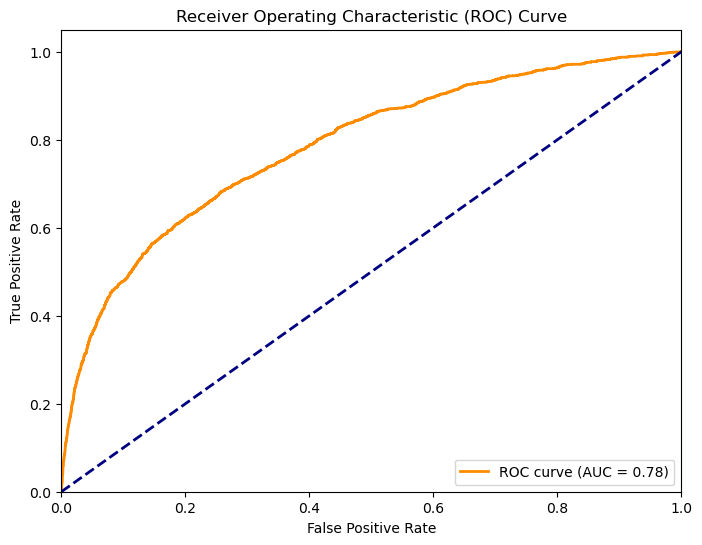


=== Test Set Metrics ===
                       precision    recall  f1-score   support

Class 0 (Non-default)       0.86      0.89      0.88      7000
    Class 1 (Default)       0.57      0.49      0.53      2000

             accuracy                           0.80      9000
            macro avg       0.71      0.69      0.70      9000
         weighted avg       0.79      0.80      0.80      9000



In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import pandas as pd

# Explicitly set scale_pos_weight to 2.5
scale_pos_weight = 2.5
print(f"Using scale_pos_weight: {scale_pos_weight:.4f}")

# Initialize the XGBoost model with scale_pos_weight set to 2.5
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.2, 1.5],
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, 
                                   n_iter=10, scoring='accuracy', 
                                   cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
best_xgb_model = random_search.best_estimator_

# Predict on the Test Set with the best model
y_test_pred_prob = best_xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Display Classification Report
print("\n=== Test Set Metrics ===")
print(classification_report(y_test, best_xgb_model.predict(X_test), target_names=["Class 0 (Non-default)", "Class 1 (Default)"]))


Using scale_pos_weight: 3.2000
Fitting 5 folds for each of 10 candidates, totalling 50 fits


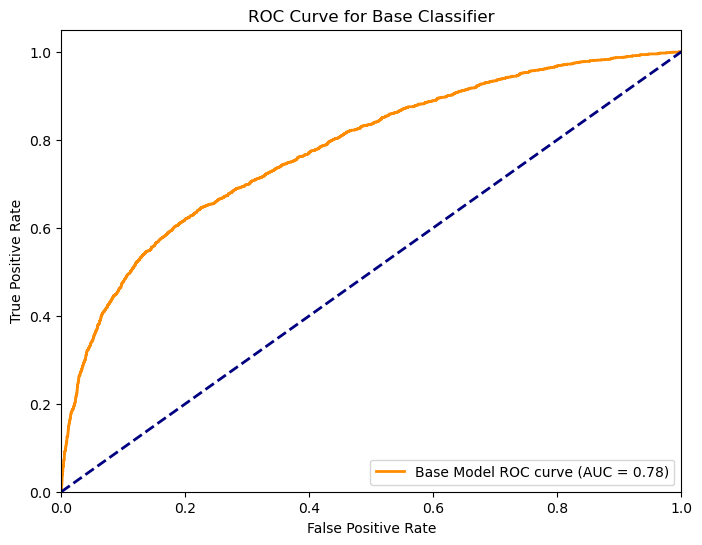


=== Base Model Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7009
           1       0.51      0.56      0.54      1991

    accuracy                           0.79      9000
   macro avg       0.69      0.71      0.70      9000
weighted avg       0.79      0.79      0.79      9000


=== Cascade Model Classification Report ===
                       precision    recall  f1-score   support

Class 0 (Non-default)       0.88      0.90      0.89      7009
    Class 1 (Default)       0.62      0.56      0.59      1991

             accuracy                           0.83      9000
            macro avg       0.75      0.73      0.74      9000
         weighted avg       0.82      0.83      0.82      9000



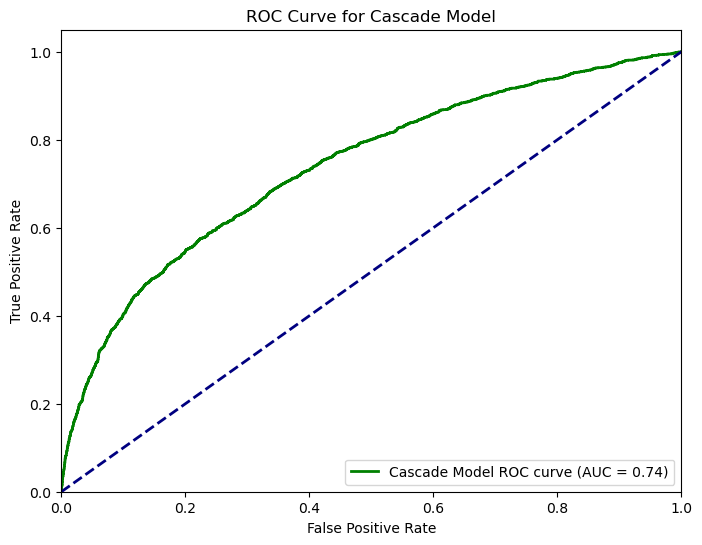

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import xgboost as xgb

# Explicitly set scale_pos_weight to 2.5
scale_pos_weight = 3.2
print(f"Using scale_pos_weight: {scale_pos_weight:.4f}")

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 1: Train the Base Classifier
xgb_base_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.2, 1.5],
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_base_model, param_distributions=param_dist, 
                                   n_iter=10, scoring='accuracy', 
                                   cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
best_base_model = random_search.best_estimator_

# Step 2: Get Predictions from Base Classifier
y_pred_base = best_base_model.predict(X_test)
y_pred_base_prob = best_base_model.predict_proba(X_test)[:, 1]

# Compute and plot ROC curve for Base Classifier
fpr, tpr, thresholds = roc_curve(y_test, y_pred_base_prob)
roc_auc_base = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Base Model ROC curve (AUC = {roc_auc_base:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Base Classifier')
plt.legend(loc="lower right")
plt.show()

print("\n=== Base Model Classification Report ===")
print(classification_report(y_test, y_pred_base))

# Step 3: Identify False Positives
false_positives_idx = np.where((y_pred_base == 1) & (y_test == 0))[0]
X_test_false_positives = X_test.iloc[false_positives_idx]
y_test_false_positives = y_test.iloc[false_positives_idx]

# Step 4: Train a Secondary Classifier
secondary_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Rebalance the data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the secondary model on the resampled data
secondary_model.fit(X_train_resampled, y_train_resampled)

# Re-classify the false positives
y_pred_secondary = secondary_model.predict(X_test_false_positives)

# Step 5: Combine Predictions
final_predictions = y_pred_base.copy()
final_predictions[false_positives_idx] = y_pred_secondary

# Step 6: Evaluate the Cascade Model
print("\n=== Cascade Model Classification Report ===")
print(classification_report(y_test, final_predictions, target_names=["Class 0 (Non-default)", "Class 1 (Default)"]))

# Compute and plot ROC curve for Cascade Model
y_test_final_prob = secondary_model.predict_proba(X_test)[:, 1]
fpr_cascade, tpr_cascade, thresholds_cascade = roc_curve(y_test, y_test_final_prob)
roc_auc_cascade = auc(fpr_cascade, tpr_cascade)

plt.figure(figsize=(8, 6))
plt.plot(fpr_cascade, tpr_cascade, color='green', lw=2, label=f'Cascade Model ROC curve (AUC = {roc_auc_cascade:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cascade Model')
plt.legend(loc="lower right")
plt.show()


# <font color ="006179"> Model Metrics on Test after Threhold Adjustment</font>  


Classification Report with Threshold 0.566:
                       precision    recall  f1-score   support

Class 0 (Non-default)       0.78      0.87      0.82      7009
    Class 1 (Default)       0.20      0.12      0.15      1991

             accuracy                           0.70      9000
            macro avg       0.49      0.49      0.48      9000
         weighted avg       0.65      0.70      0.67      9000

Evaluation Metrics with Threshold 0.566:
Accuracy: 0.7004
Precision (Class 0): 0.7759
Precision (Class 1): 0.2020
Recall (Class 0): 0.8653
Recall (Class 1): 0.1200
F1 Score (Class 0): 0.8182
F1 Score (Class 1): 0.1506
ROC-AUC: 0.4927


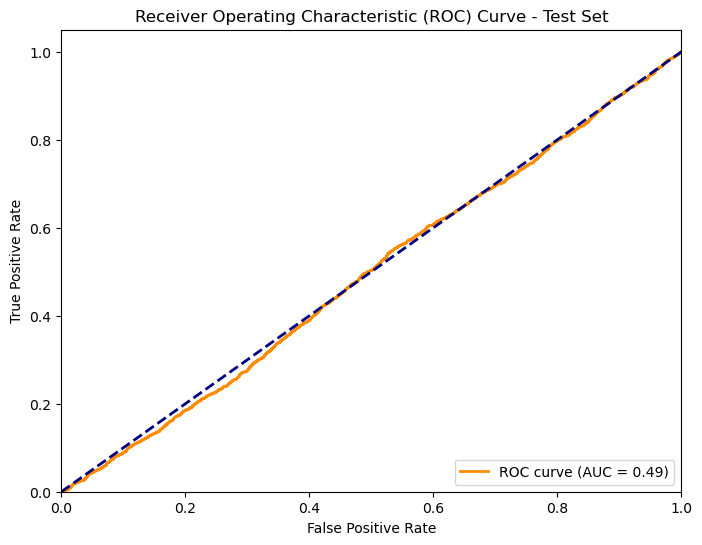


=== Test Set Metrics without Threshold Adjustment ===
                       precision    recall  f1-score   support

Class 0 (Non-default)       0.87      0.90      0.88      7009
    Class 1 (Default)       0.60      0.54      0.56      1991

             accuracy                           0.82      9000
            macro avg       0.73      0.72      0.72      9000
         weighted avg       0.81      0.82      0.81      9000



In [52]:
# Set a custom threshold (lowering to classify more as Class 1)
threshold = 0.566
y_test_pred_threshold = (y_test_pred_prob >= threshold).astype(int)

# Evaluate the model with the adjusted threshold for test set
accuracy_threshold = accuracy_score(y_test, y_test_pred_threshold)
precision_class_0_threshold = precision_score(y_test, y_test_pred_threshold, pos_label=0)
precision_class_1_threshold = precision_score(y_test, y_test_pred_threshold, pos_label=1)
recall_class_0_threshold = recall_score(y_test, y_test_pred_threshold, pos_label=0)
recall_class_1_threshold = recall_score(y_test, y_test_pred_threshold, pos_label=1)
f1_class_0_threshold = f1_score(y_test, y_test_pred_threshold, pos_label=0)
f1_class_1_threshold = f1_score(y_test, y_test_pred_threshold, pos_label=1)
roc_auc_threshold = roc_auc_score(y_test, y_test_pred_threshold)

# Print the classification report with threshold adjustment for test set
print(f"\nClassification Report with Threshold {threshold}:")
print(classification_report(y_test, y_test_pred_threshold, target_names=["Class 0 (Non-default)", "Class 1 (Default)"]))

# Print the evaluation metrics with threshold adjustment for test set
print(f"Evaluation Metrics with Threshold {threshold}:")
print(f"Accuracy: {accuracy_threshold:.4f}")
print(f"Precision (Class 0): {precision_class_0_threshold:.4f}")
print(f"Precision (Class 1): {precision_class_1_threshold:.4f}")
print(f"Recall (Class 0): {recall_class_0_threshold:.4f}")
print(f"Recall (Class 1): {recall_class_1_threshold:.4f}")
print(f"F1 Score (Class 0): {f1_class_0_threshold:.4f}")
print(f"F1 Score (Class 1): {f1_class_1_threshold:.4f}")
print(f"ROC-AUC: {roc_auc_threshold:.4f}")

# Compute ROC curve and AUC for the test set
fpr, tpr, thresholds_roc = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr, tpr)

# Plot ROC curve for test set
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc="lower right")
plt.show()

# Display Classification Report for Test Set without Threshold Adjustment
print("\n=== Test Set Metrics without Threshold Adjustment ===")
print(classification_report(y_test, best_xgb_model.predict(X_test), target_names=["Class 0 (Non-default)", "Class 1 (Default)"]))

# <font color ="006179"> Using SHAP </font>  

In [33]:
import shap


--- Overall Model Explainability ---


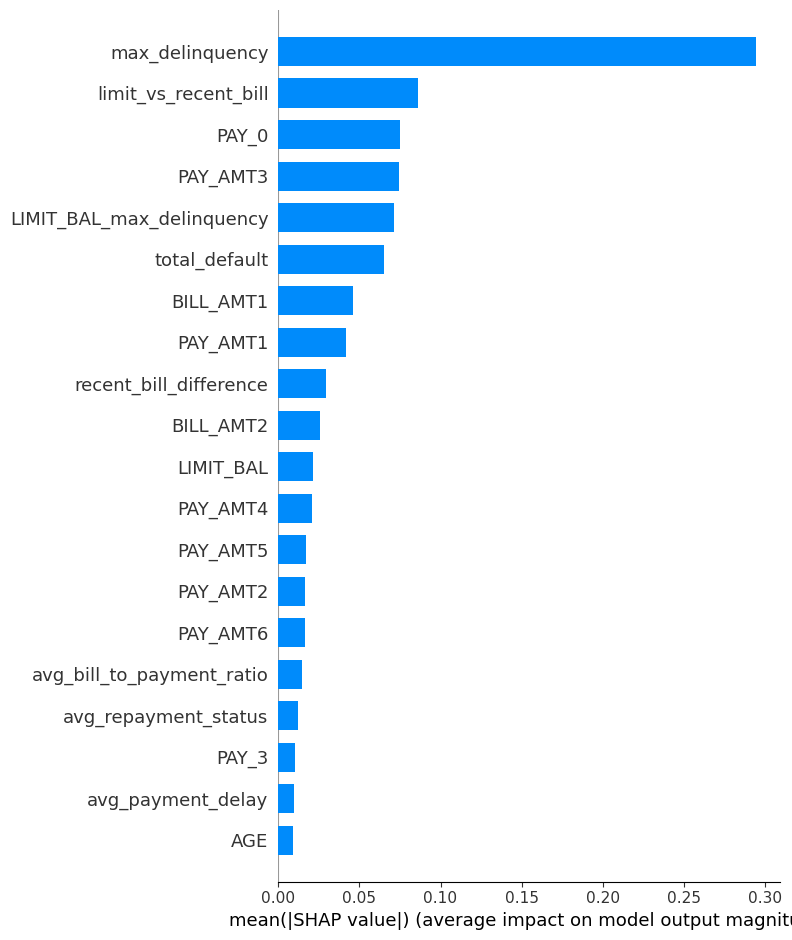

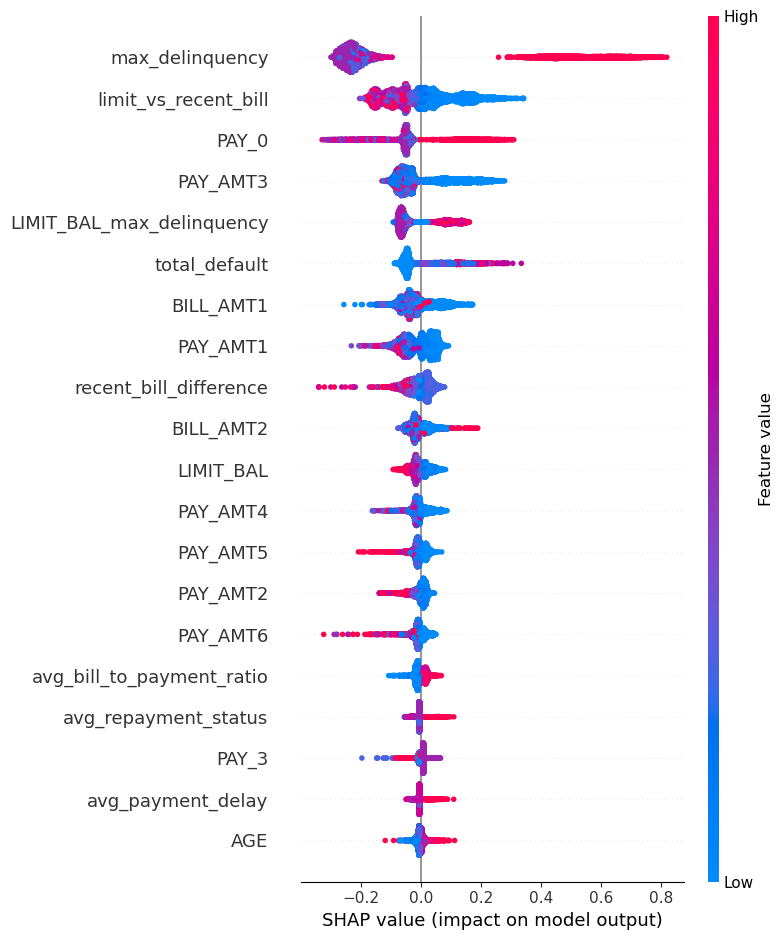


--- Individual-Level Model Explainability ---


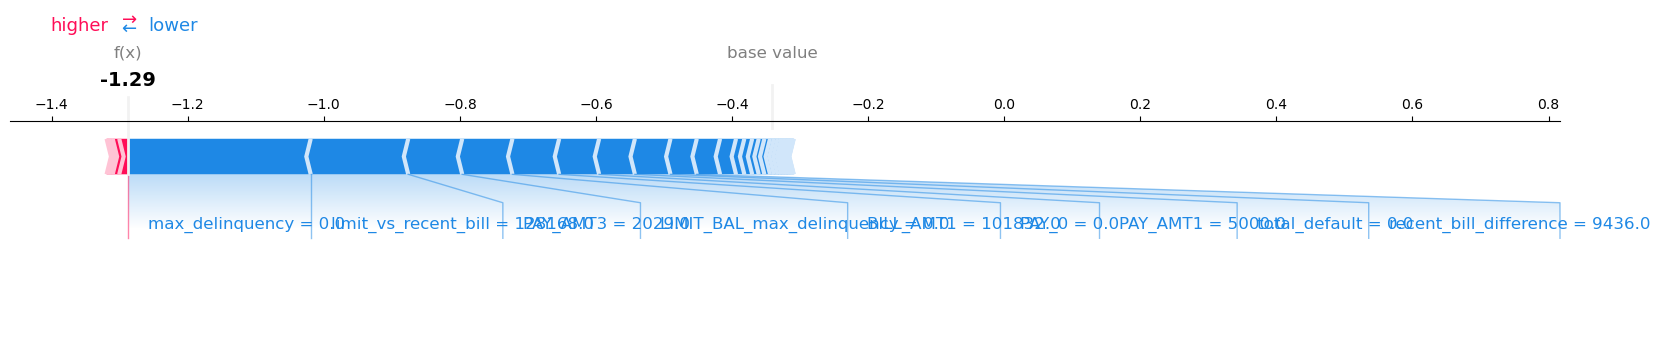

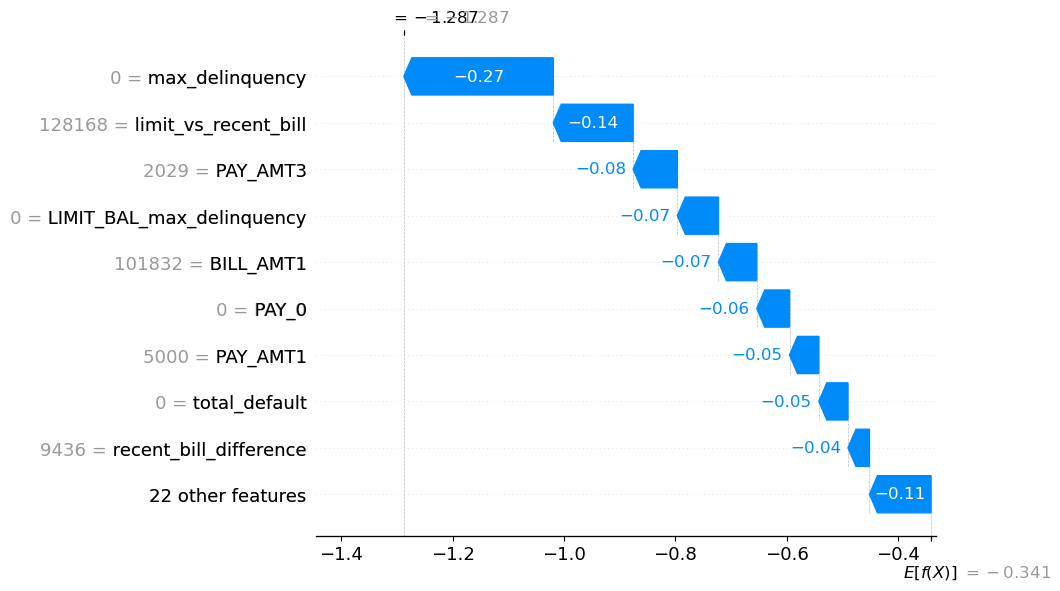

In [34]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer object for the XGBoost model
explainer = shap.TreeExplainer(best_xgb_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Overall Model Explainability
print("\n--- Overall Model Explainability ---")
# Summary plot to show the importance of features across all predictions
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

# Individual-Level Explainability
print("\n--- Individual-Level Model Explainability ---")
# Choose an instance to explain
instance_index = 0  # Index of the instance in the test set to explain
instance = X_test.iloc[instance_index]

# Explain the prediction for this instance
shap.force_plot(
    explainer.expected_value, 
    shap_values[instance_index], 
    instance, 
    matplotlib=True
)

# Detailed visualization for the chosen instance
shap.waterfall_plot(shap.Explanation(values=shap_values[instance_index], base_values=explainer.expected_value, data=instance.values, feature_names=instance.index))


In [35]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Create a SHAP explainer object for the XGBoost model
explainer = shap.TreeExplainer(best_xgb_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Compute mean absolute SHAP values for each feature
shap_summary = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean |SHAP Value|': np.abs(shap_values).mean(axis=0)
})

# Sort features by importance (descending order)
shap_summary_sorted = shap_summary.sort_values(by='Mean |SHAP Value|', ascending=False)

# Display the top features
top_features = shap_summary_sorted.head(10)
print("Top Features Contributing to the Model's Predictions:")
print(top_features)

# Display the least 5 features
least_features = shap_summary_sorted.tail(5)
print("\nLeast Features Contributing to the Model's Predictions:")
print(least_features)


Top Features Contributing to the Model's Predictions:
                      Feature  Mean |SHAP Value|
25            max_delinquency           0.294544
29       limit_vs_recent_bill           0.086006
4                       PAY_0           0.075082
18                   PAY_AMT3           0.074504
26  LIMIT_BAL_max_delinquency           0.071030
23              total_default           0.065432
10                  BILL_AMT1           0.046288
16                   PAY_AMT1           0.041743
30     recent_bill_difference           0.029530
11                  BILL_AMT2           0.025446

Least Features Contributing to the Model's Predictions:
          Feature  Mean |SHAP Value|
8           PAY_5           0.005387
13      BILL_AMT4           0.005182
1       EDUCATION           0.005107
9           PAY_6           0.004873
27  TIMELYPAYMENT           0.000134


# <font color ="006179"> Model Fairness </font>  

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   LIMIT_BAL                  30000 non-null  int64
 1   EDUCATION                  30000 non-null  int64
 2   MARRIAGE                   30000 non-null  int64
 3   AGE                        30000 non-null  int64
 4   PAY_0                      30000 non-null  int64
 5   PAY_2                      30000 non-null  int64
 6   PAY_3                      30000 non-null  int64
 7   PAY_4                      30000 non-null  int64
 8   PAY_5                      30000 non-null  int64
 9   PAY_6                      30000 non-null  int64
 10  BILL_AMT1                  30000 non-null  int64
 11  BILL_AMT2                  30000 non-null  int64
 12  BILL_AMT3                  30000 non-null  int64
 13  BILL_AMT4                  30000 non-null  int64
 14  BILL_AMT5             

In [37]:
import numpy as np
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [38]:

# Example: Generate some fake sensitive attribute (replace with actual data)
sensitive_attribute = np.random.choice([0, 1], size=len(y_test))  # Simulating a sensitive attribute (e.g., gender)

# Step 2: Create MetricFrame for fairness evaluation
metric_frame = MetricFrame(metrics={
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1_score': f1_score
}, y_true=y_test, y_pred=y_test_pred_threshold, sensitive_features=sensitive_attribute)

# Step 3: Evaluate fairness metrics
print("Fairness Metrics by Group:")
print(metric_frame.by_group)

# Step 4: Display overall fairness metrics (macro averages for all groups)
print("\nOverall Fairness Metrics:")
print(metric_frame.overall)

Fairness Metrics by Group:
                     accuracy  precision    recall  f1_score
sensitive_feature_0                                         
0                    0.697116   0.207337  0.128840  0.158924
1                    0.698228   0.195980  0.119145  0.148195

Overall Fairness Metrics:
accuracy     0.697667
precision    0.201797
recall       0.124058
f1_score     0.153655
dtype: float64


In [39]:
import pandas as pd
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assume df is your DataFrame and the target variable is 'default_payment'
# Select sensitive attribute (e.g., 'AGE')
sensitive_attribute = df['AGE']  # or any other column like 'EDUCATION' or 'MARRIAGE'

# Define feature columns (excluding sensitive attribute and target)
feature_columns = [col for col in df.columns if col not in ['default_payment', 'AGE']]  # Adjust based on chosen sensitive attribute

# Define the target
y = df['default_payment']
X = df[feature_columns]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Extract the sensitive attribute values for the test set
sensitive_attribute_test = sensitive_attribute.loc[X_test.index]

# Train a Random Forest Classifier (you can use any classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get predictions on the test set
y_test_pred = model.predict(X_test)

# Create MetricFrame for fairness evaluation
metric_frame = MetricFrame(
    metrics={
        'accuracy': accuracy_score,
        'precision': precision_score,
        'recall': recall_score,
        'f1_score': f1_score
    },
    y_true=y_test,
    y_pred=y_test_pred,
    sensitive_features=sensitive_attribute_test
)

# Display fairness metrics by group (e.g., by AGE group)
print("Fairness Metrics by Group:")
print(metric_frame.by_group)

# Display overall metrics (aggregated across all groups)
print("\nOverall Fairness Metrics:")
print(metric_frame.overall)


Fairness Metrics by Group:
     accuracy  precision    recall  f1_score
AGE                                         
21   0.714286   1.000000  0.333333  0.500000
22   0.773006   0.666667  0.425532  0.519481
23   0.741007   0.539683  0.441558  0.485714
24   0.800000   0.666667  0.400000  0.500000
25   0.833837   0.767442  0.423077  0.545455
26   0.819892   0.678571  0.436782  0.531469
27   0.844398   0.686275  0.372340  0.482759
28   0.819599   0.629630  0.357895  0.456376
29   0.828452   0.661290  0.401961  0.500000
30   0.830424   0.551020  0.369863  0.442623
31   0.828877   0.650000  0.342105  0.448276
32   0.805389   0.545455  0.264706  0.356436
33   0.831461   0.531250  0.274194  0.361702
34   0.792507   0.421053  0.242424  0.307692
35   0.825352   0.595745  0.394366  0.474576
36   0.778107   0.531915  0.320513  0.400000
37   0.864238   0.777778  0.459016  0.577320
38   0.811644   0.500000  0.290909  0.367816
39   0.863333   0.692308  0.352941  0.467532
40   0.833948   0.514286  0.

c:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classificati

Overall Fairness Metrics:
These are the aggregated performance metrics for all age groups combined:

Accuracy: 81.28% – The model’s overall proportion of correct predictions.
Precision: 61.90% – The model’s overall proportion of correct positive predictions.
Recall: 36.48% – The model’s ability to correctly identify actual positive cases.
F1-Score: 45.91% – A combined metric of precision and recall.

What Does This Mean?
Model Performance:
- The model generally performs well with an accuracy of 81.28%. However, the recall is much lower (36.48%), indicating that the model struggles to identify positive cases (i.e., individuals who default on payment).
Precision and recall do not align well, meaning the model might be conservative in predicting positives but misses many actual positives (low recall).
Fairness across Groups:
- The model's performance is not consistent across different age groups. For example, the model performs perfectly for some age groups (e.g., AGE 64) but fails entirely for others (e.g., AGE 75).
There are some age groups with very low recall (e.g., AGE 21 and AGE 75), meaning the model does not detect many of the true positive instances in those groups.
Conclusion:
- The model may need adjustments, such as better handling of certain age groups where performance is poor.
You may consider techniques like resampling, feature engineering, or using fairness constraints to improve fairness across different sensitive groups.
- The overall low recall suggests that the model is missing many positive cases (those who default on payment), which could be improved by tweaking the model or using different evaluation strategies (e.g., balancing the dataset or adjusting thresholds).

# <font color ="006179"> EDUCATION and Marriage </font>  

In [40]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'df' is already loaded and processed
# Define features (X) and target (y)
X = df.drop(columns=['default_payment'])  # Features
y = df['default_payment']  # Target variable

# Define sensitive attributes (AGE, MARRIAGE, EDUCATION)
sensitive_attributes = df[['MARRIAGE', 'EDUCATION']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test, sensitive_train, sensitive_test = train_test_split(
    X, y, sensitive_attributes, test_size=0.2, random_state=42
)

# Fairness constraints: Demographic Parity
fair_model = ExponentiatedGradient(
    estimator=RandomForestClassifier(random_state=42),
    constraints=DemographicParity()
)

# Fit the fair model using multiple sensitive attributes
fair_model.fit(X_train, y_train, sensitive_features=sensitive_train)

# Make predictions on the test set
y_test_pred_fair = fair_model.predict(X_test)

# Evaluate fairness for the fair model with multiple sensitive attributes
fair_metric_frame = MetricFrame(
    metrics={'accuracy': accuracy_score, 'precision': precision_score, 'recall': recall_score, 'f1_score': f1_score},
    y_true=y_test,
    y_pred=y_test_pred_fair,
    sensitive_features=sensitive_test
)

# Print fairness metrics by group for all sensitive attributes
print("Fair Model Fairness Metrics by Group (MARRIAGE, EDUCATION):")
print(fair_metric_frame.by_group)


KeyboardInterrupt: 

In [55]:
df_sample = df.sample(frac=0.1, random_state=42)  # Use 10% of the data for testing


In [56]:
fair_model = ExponentiatedGradient(
    estimator=RandomForestClassifier(
        n_estimators=50,  # Reduce number of trees
        max_depth=10,     # Limit tree depth
        n_jobs=-1,        # Use all available CPU cores
        random_state=42
    ),
    constraints=DemographicParity()
)


In [59]:
import warnings
warnings.filterwarnings('ignore')

from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Sample the dataset for faster execution
df_sample = df.sample(frac=0.1, random_state=42)  # 10% of the original data
X = df_sample.drop(columns=['default_payment'])  # Features
y = df_sample['default_payment']  # Target variable

# Sensitive attributes
sensitive_attributes_marriage = df_sample['MARRIAGE']
sensitive_attributes_education = df_sample['EDUCATION']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sensitive_train_marriage, sensitive_test_marriage = train_test_split(sensitive_attributes_marriage, test_size=0.2, random_state=42)
sensitive_train_education, sensitive_test_education = train_test_split(sensitive_attributes_education, test_size=0.2, random_state=42)

# Optimized Fair Model
fair_model = ExponentiatedGradient(
    estimator=RandomForestClassifier(
        n_estimators=50,  # Reduce number of trees
        max_depth=10,     # Limit depth
        n_jobs=-1,        # Use multiple cores
        random_state=42
    ),
    constraints=DemographicParity()
)

# Fit the model
fair_model.fit(X_train, y_train, sensitive_features=sensitive_train_marriage)

# Predictions
y_test_pred_fair = fair_model.predict(X_test)

# Fairness metrics for Marriage
print("=== 1. Fairness Metrics by Group (MARRIAGE) ===")
fair_metric_frame_marriage = MetricFrame(
    metrics={'accuracy': accuracy_score, 'precision': precision_score, 'recall': recall_score, 'f1_score': f1_score},
    y_true=y_test,
    y_pred=y_test_pred_fair,
    sensitive_features=sensitive_test_marriage
)
print(fair_metric_frame_marriage.by_group)


=== 1. Fairness Metrics by Group (MARRIAGE) ===
          accuracy  precision    recall  f1_score
MARRIAGE                                         
1         0.772388   0.480769  0.423729   0.45045
2         0.793313   0.478873  0.523077   0.50000
3         0.666667   0.000000  0.000000   0.00000


In [60]:
import warnings
warnings.filterwarnings('ignore')

# Fairness metrics for Education
print("\n=== 2. Fairness Metrics by Group (EDUCATION) ===")
fair_metric_frame_education = MetricFrame(
    metrics={'accuracy': accuracy_score, 'precision': precision_score, 'recall': recall_score, 'f1_score': f1_score},
    y_true=y_test,
    y_pred=y_test_pred_fair,
    sensitive_features=sensitive_test_education
)
print(fair_metric_frame_education.by_group)


=== 2. Fairness Metrics by Group (EDUCATION) ===
           accuracy  precision    recall  f1_score
EDUCATION                                         
1          0.784810   0.487179  0.380000  0.426966
2          0.777344   0.450000  0.529412  0.486486
3          0.783505   0.565217  0.541667  0.553191
4          1.000000   0.000000  0.000000  0.000000
5          0.800000   0.000000  0.000000  0.000000
6          1.000000   0.000000  0.000000  0.000000
